# RashomonSetAnalyser class

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dalex as dx
import copy

In [2]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)

params = {'n_estimators': list(np.arange(10, 300, 10, dtype = 'int'))}
rf = RandomForestClassifier()

In [3]:
from RashomonSetAnalyser import RashomonSetAnalyser

### How does this class work?

In [4]:
rashomon = RashomonSetAnalyser()

In [5]:
rashomon.base_model is None

True

In [6]:
rashomon.generate_rashomon_set(X, y, rf, searcher_type = 'grid', rashomon_ratio = 1, param_grid = params)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.136902,0.003168,0.009916,0.000147,90,{'n_estimators': 90},0.938596,0.947368,0.991228,0.982456,0.982301,0.968390,0.021178,1
1,0.430997,0.016965,0.027135,0.001175,270,{'n_estimators': 270},0.929825,0.947368,0.991228,0.982456,0.982301,0.966636,0.023777,2
2,0.034997,0.000857,0.004205,0.000303,20,{'n_estimators': 20},0.947368,0.956140,0.964912,0.982456,0.982301,0.966636,0.014000,2
3,0.422345,0.004509,0.027029,0.000812,280,{'n_estimators': 280},0.929825,0.947368,0.991228,0.973684,0.982301,0.964881,0.022851,4
4,0.426568,0.032839,0.027832,0.001558,240,{'n_estimators': 240},0.929825,0.947368,0.991228,0.973684,0.982301,0.964881,0.022851,4
5,0.277657,0.035072,0.020878,0.004541,140,{'n_estimators': 140},0.929825,0.956140,0.991228,0.973684,0.973451,0.964866,0.020739,6
6,0.064798,0.016944,0.007732,0.003730,30,{'n_estimators': 30},0.929825,0.956140,0.991228,0.973684,0.973451,0.964866,0.020739,6
7,0.309373,0.084832,0.017320,0.002504,150,{'n_estimators': 150},0.929825,0.947368,0.991228,0.982456,0.973451,0.964866,0.022857,8
8,0.415956,0.008370,0.026289,0.001167,260,{'n_estimators': 260},0.929825,0.947368,0.991228,0.982456,0.973451,0.964866,0.022857,8
9,0.491039,0.068194,0.032084,0.004859,290,{'n_estimators': 290},0.929825,0.947368,0.991228,0.982456,0.973451,0.964866,0.022857,8


In [7]:
rashomon.base_model

['Base model', RandomForestClassifier(n_estimators=90)]

In [8]:
rashomon.models

[['Model 1', RandomForestClassifier(n_estimators=270)],
 ['Model 2', RandomForestClassifier(n_estimators=20)],
 ['Model 3', RandomForestClassifier(n_estimators=280)],
 ['Model 4', RandomForestClassifier(n_estimators=240)],
 ['Model 5', RandomForestClassifier(n_estimators=140)],
 ['Model 6', RandomForestClassifier(n_estimators=30)],
 ['Model 7', RandomForestClassifier(n_estimators=150)],
 ['Model 8', RandomForestClassifier(n_estimators=260)],
 ['Model 9', RandomForestClassifier(n_estimators=290)],
 ['Model 10', RandomForestClassifier(n_estimators=40)],
 ['Model 11', RandomForestClassifier(n_estimators=180)],
 ['Model 12', RandomForestClassifier(n_estimators=50)],
 ['Model 13', RandomForestClassifier(n_estimators=200)],
 ['Model 14', RandomForestClassifier(n_estimators=220)],
 ['Model 15', RandomForestClassifier(n_estimators=190)],
 ['Model 16', RandomForestClassifier(n_estimators=230)],
 ['Model 17', RandomForestClassifier(n_estimators=210)],
 ['Model 18', RandomForestClassifier(n_estim

In [9]:
rashomon.change_rashomon_ratio(0.6)

In [10]:
rashomon.models

[['Model 1', RandomForestClassifier(n_estimators=270)],
 ['Model 2', RandomForestClassifier(n_estimators=20)],
 ['Model 3', RandomForestClassifier(n_estimators=280)],
 ['Model 4', RandomForestClassifier(n_estimators=240)],
 ['Model 5', RandomForestClassifier(n_estimators=140)],
 ['Model 6', RandomForestClassifier(n_estimators=30)],
 ['Model 7', RandomForestClassifier(n_estimators=150)],
 ['Model 8', RandomForestClassifier(n_estimators=260)],
 ['Model 9', RandomForestClassifier(n_estimators=290)],
 ['Model 10', RandomForestClassifier(n_estimators=40)],
 ['Model 11', RandomForestClassifier(n_estimators=180)],
 ['Model 12', RandomForestClassifier(n_estimators=50)],
 ['Model 13', RandomForestClassifier(n_estimators=200)],
 ['Model 14', RandomForestClassifier(n_estimators=220)],
 ['Model 15', RandomForestClassifier(n_estimators=190)],
 ['Model 16', RandomForestClassifier(n_estimators=230)],
 ['Model 17', RandomForestClassifier(n_estimators=210)]]

### Rashomon ratio plot

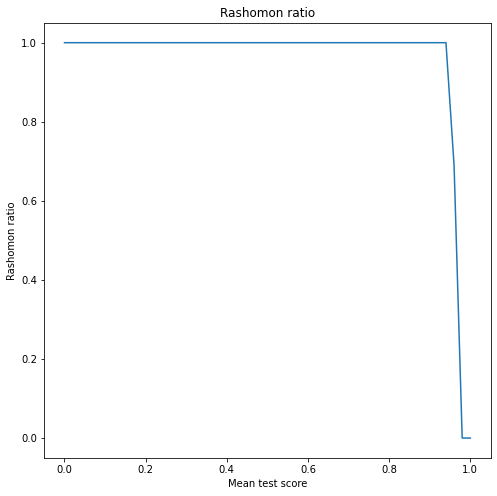

In [11]:
rashomon.rashomon_ratio_plot()

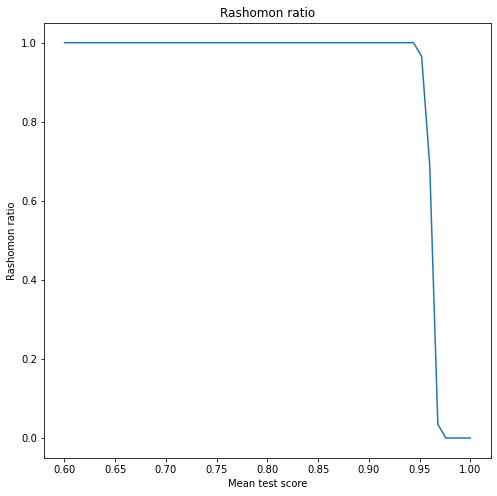

In [12]:
rashomon.rashomon_ratio_plot(plot_range = (0.6, 1))

### Fit models

In [13]:
rashomon.fit(X, y)

### Compare PDP

In [14]:
rashomon.pdp_comparator(X, y)

,colname,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12,Model 13,Model 14,Model 15,Model 16,Model 17
0,mean radius,1.043519,1.435130,0.732127,0.641370,0.668460,1.849000,0.744748,0.518333,1.773831,2.166889,0.407796,0.846156,0.357380,0.908670,1.171302,1.239184,1.307434
1,mean texture,0.487519,0.293296,0.442238,0.441389,0.564608,0.832852,0.723593,0.423802,0.700683,0.991685,0.227056,0.433452,0.307078,0.427436,0.426041,0.525409,0.427778
2,mean perimeter,0.981185,2.122907,0.533475,0.722282,0.994093,3.899259,1.237193,0.766161,0.306011,0.727583,0.638074,1.013081,0.622257,0.538741,0.852569,0.623741,0.307963
3,mean area,0.428691,3.497778,0.186557,0.538806,1.589455,1.561519,0.632874,0.729024,0.546621,2.610519,0.798241,2.604407,1.170585,1.416810,0.194349,0.763124,1.560116
4,mean smoothness,0.514741,0.344796,0.242034,0.429273,0.623317,0.487556,0.539948,0.234044,0.629133,0.489296,0.280833,0.243400,0.315809,0.458670,0.588996,0.364789,0.438810
5,mean compactness,0.158901,2.950963,0.391993,0.252370,0.140352,0.622778,0.307170,0.439009,0.215649,0.189389,0.347019,0.688126,0.365252,0.253816,0.250632,0.269676,0.315471
6,mean concavity,1.852148,0.995037,1.227628,0.308421,0.381860,2.360407,1.548163,0.501751,1.117951,1.502352,0.901333,1.501341,1.102822,0.952966,0.519444,1.262082,0.773635
7,mean concave points,0.564605,1.856907,0.399053,0.462222,0.965296,1.496333,0.942415,0.351171,0.439612,0.784954,1.872685,0.967696,1.344144,0.864476,0.633388,0.759216,0.642963
8,mean symmetry,0.446321,0.511926,0.370821,0.385042,0.436053,0.671000,0.430096,0.251687,0.536999,0.474037,0.254407,0.457474,0.533507,0.364485,0.281101,0.355510,0.261984
9,mean fractal dimension,0.328432,0.275796,0.127484,0.391606,0.236262,0.172667,0.613207,0.186868,0.342745,0.339750,0.292796,0.222170,0.353880,0.191577,0.164230,0.299485,0.206450


In [15]:
rashomon.pdp_comparator(X, y, metric = 'integrate')

,colname,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12,Model 13,Model 14,Model 15,Model 16,Model 17
0,mean radius,-18.224242,-24.144936,-14.202639,-12.711381,-13.286241,-37.118071,-1.608806,-9.596520,-37.594685,-44.484950,-4.845128,-12.538463,-4.134642,-17.397373,-24.563875,-25.689452,-27.292255
1,mean texture,-11.240257,-3.261062,-1.882080,-3.003280,-6.650680,18.821327,-7.727537,-5.020947,-9.138477,-22.678268,0.028629,4.283740,-4.975387,0.463784,-3.501118,-6.226679,1.280352
2,mean perimeter,-115.085676,-237.060853,-17.175125,9.753387,113.962628,490.796814,97.463369,-71.321162,-8.247366,-22.461271,-55.846363,-113.481058,-57.219489,-41.167348,-98.933982,61.113449,-10.362944
3,mean area,413.035556,5453.427197,-74.334485,-658.234230,-2352.456984,2349.187364,767.092598,-1102.158745,529.522760,-3499.631078,-1109.714807,-4052.540541,-1723.053774,-2041.188644,-63.951183,-1053.187208,-2309.361688
4,mean smoothness,-0.051267,-0.029199,-0.026400,-0.043649,-0.057177,0.049407,-0.050425,0.000414,-0.061089,-0.049807,-0.018275,-0.008289,-0.022834,-0.013841,-0.045295,-0.035364,-0.016250
5,mean compactness,0.015622,0.634591,-0.046731,0.045173,0.008482,0.116088,0.051667,0.073658,-0.040961,0.023004,-0.046368,-0.109455,-0.004024,0.002376,0.010378,0.011812,-0.005088
6,mean concavity,-0.455815,-0.147634,-0.327068,-0.003913,-0.051410,-0.622319,-0.406407,-0.111292,-0.277581,-0.388980,-0.228650,-0.328160,-0.262343,-0.232460,-0.109931,-0.300105,-0.138515
7,mean concave points,0.034414,-0.132794,0.027142,0.017807,-0.062029,-0.049662,-0.060647,0.015118,0.007552,0.026620,0.207007,0.085736,0.140714,0.069018,0.046552,0.041397,0.039308
8,mean symmetry,-0.054609,-0.042991,0.033264,-0.013656,-0.055196,0.131861,-0.077791,-0.006111,-0.057449,-0.002335,0.013206,-0.040468,-0.012605,0.012839,0.032989,-0.016529,0.021698
9,mean fractal dimension,-0.023797,0.003012,-0.003610,-0.030114,-0.003776,0.003568,-0.047811,-0.011606,-0.022704,-0.019884,-0.019829,-0.013948,-0.025346,-0.003762,-0.009680,-0.020226,-0.004399


### Comapre PDP with parameter *save_model_profiles=True* and change metrics

In [16]:
rashomon.pdp_comparator(X, y, save_model_profiles = True)

,colname,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12,Model 13,Model 14,Model 15,Model 16,Model 17
0,mean radius,1.043519,1.435130,0.732127,0.641370,0.668460,1.849000,0.744748,0.518333,1.773831,2.166889,0.407796,0.846156,0.357380,0.908670,1.171302,1.239184,1.307434
1,mean texture,0.487519,0.293296,0.442238,0.441389,0.564608,0.832852,0.723593,0.423802,0.700683,0.991685,0.227056,0.433452,0.307078,0.427436,0.426041,0.525409,0.427778
2,mean perimeter,0.981185,2.122907,0.533475,0.722282,0.994093,3.899259,1.237193,0.766161,0.306011,0.727583,0.638074,1.013081,0.622257,0.538741,0.852569,0.623741,0.307963
3,mean area,0.428691,3.497778,0.186557,0.538806,1.589455,1.561519,0.632874,0.729024,0.546621,2.610519,0.798241,2.604407,1.170585,1.416810,0.194349,0.763124,1.560116
4,mean smoothness,0.514741,0.344796,0.242034,0.429273,0.623317,0.487556,0.539948,0.234044,0.629133,0.489296,0.280833,0.243400,0.315809,0.458670,0.588996,0.364789,0.438810
5,mean compactness,0.158901,2.950963,0.391993,0.252370,0.140352,0.622778,0.307170,0.439009,0.215649,0.189389,0.347019,0.688126,0.365252,0.253816,0.250632,0.269676,0.315471
6,mean concavity,1.852148,0.995037,1.227628,0.308421,0.381860,2.360407,1.548163,0.501751,1.117951,1.502352,0.901333,1.501341,1.102822,0.952966,0.519444,1.262082,0.773635
7,mean concave points,0.564605,1.856907,0.399053,0.462222,0.965296,1.496333,0.942415,0.351171,0.439612,0.784954,1.872685,0.967696,1.344144,0.864476,0.633388,0.759216,0.642963
8,mean symmetry,0.446321,0.511926,0.370821,0.385042,0.436053,0.671000,0.430096,0.251687,0.536999,0.474037,0.254407,0.457474,0.533507,0.364485,0.281101,0.355510,0.261984
9,mean fractal dimension,0.328432,0.275796,0.127484,0.391606,0.236262,0.172667,0.613207,0.186868,0.342745,0.339750,0.292796,0.222170,0.353880,0.191577,0.164230,0.299485,0.206450


In [17]:
rashomon.pdp_comparator_change_metric(metric = 'integrate')

,colname,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12,Model 13,Model 14,Model 15,Model 16,Model 17
0,mean radius,-18.224242,-24.144936,-14.202639,-12.711381,-13.286241,-37.118071,-1.608806,-9.596520,-37.594685,-44.484950,-4.845128,-12.538463,-4.134642,-17.397373,-24.563875,-25.689452,-27.292255
1,mean texture,-11.240257,-3.261062,-1.882080,-3.003280,-6.650680,18.821327,-7.727537,-5.020947,-9.138477,-22.678268,0.028629,4.283740,-4.975387,0.463784,-3.501118,-6.226679,1.280352
2,mean perimeter,-115.085676,-237.060853,-17.175125,9.753387,113.962628,490.796814,97.463369,-71.321162,-8.247366,-22.461271,-55.846363,-113.481058,-57.219489,-41.167348,-98.933982,61.113449,-10.362944
3,mean area,413.035556,5453.427197,-74.334485,-658.234230,-2352.456984,2349.187364,767.092598,-1102.158745,529.522760,-3499.631078,-1109.714807,-4052.540541,-1723.053774,-2041.188644,-63.951183,-1053.187208,-2309.361688
4,mean smoothness,-0.051267,-0.029199,-0.026400,-0.043649,-0.057177,0.049407,-0.050425,0.000414,-0.061089,-0.049807,-0.018275,-0.008289,-0.022834,-0.013841,-0.045295,-0.035364,-0.016250
5,mean compactness,0.015622,0.634591,-0.046731,0.045173,0.008482,0.116088,0.051667,0.073658,-0.040961,0.023004,-0.046368,-0.109455,-0.004024,0.002376,0.010378,0.011812,-0.005088
6,mean concavity,-0.455815,-0.147634,-0.327068,-0.003913,-0.051410,-0.622319,-0.406407,-0.111292,-0.277581,-0.388980,-0.228650,-0.328160,-0.262343,-0.232460,-0.109931,-0.300105,-0.138515
7,mean concave points,0.034414,-0.132794,0.027142,0.017807,-0.062029,-0.049662,-0.060647,0.015118,0.007552,0.026620,0.207007,0.085736,0.140714,0.069018,0.046552,0.041397,0.039308
8,mean symmetry,-0.054609,-0.042991,0.033264,-0.013656,-0.055196,0.131861,-0.077791,-0.006111,-0.057449,-0.002335,0.013206,-0.040468,-0.012605,0.012839,0.032989,-0.016529,0.021698
9,mean fractal dimension,-0.023797,0.003012,-0.003610,-0.030114,-0.003776,0.003568,-0.047811,-0.011606,-0.022704,-0.019884,-0.019829,-0.013948,-0.025346,-0.003762,-0.009680,-0.020226,-0.004399


In [18]:
rashomon.pdp_comparator_change_metric(metric = 'sum')

,colname,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12,Model 13,Model 14,Model 15,Model 16,Model 17
0,mean radius,-1.020111,-0.969389,-0.699222,-0.633944,-0.637127,-1.705889,-0.349800,-0.508966,-1.773831,-2.166889,-0.400315,-0.846156,-0.274639,-0.866374,-1.163450,-1.216005,-1.290714
1,mean texture,-0.329099,-0.166444,0.088341,0.027194,-0.079444,0.736111,-0.086200,-0.064457,-0.157697,-0.964778,0.080352,0.283422,-0.106711,0.193237,-0.016918,-0.092459,0.238730
2,mean perimeter,-0.856099,-1.610056,-0.345687,-0.168875,0.709802,3.345111,0.478911,-0.643235,-0.172602,-0.466306,-0.484963,-0.943156,-0.518406,-0.450040,-0.780152,0.359097,-0.107540
3,mean area,0.172691,3.494148,-0.165221,-0.525824,-1.549233,1.447593,0.376770,-0.687506,0.194907,-2.610519,-0.771907,-2.517119,-1.170585,-1.335382,-0.148501,-0.709765,-1.502772
4,mean smoothness,-0.513111,-0.265759,-0.227950,-0.429273,-0.610545,0.410741,-0.539948,0.056882,-0.629133,-0.489093,-0.204241,-0.021993,-0.249043,-0.267805,-0.538365,-0.353926,-0.222799
5,mean compactness,0.124679,2.249444,-0.024925,0.245806,0.114897,0.622778,0.288089,0.439009,-0.131728,0.119944,-0.070944,-0.254689,0.158244,0.126005,0.185708,0.172140,0.155841
6,mean concavity,-1.752593,-0.821000,-1.140869,0.129958,-0.170548,-2.164556,-1.484133,-0.285218,-1.009103,-1.340667,-0.805333,-0.889400,-1.011233,-0.758515,-0.327316,-0.983058,-0.342175
7,mean concave points,0.495840,-0.424500,0.179786,0.424111,-0.097048,0.443000,-0.162933,0.319590,0.337862,0.765250,1.817426,0.474733,1.306633,0.855864,0.627684,0.755000,0.634032
8,mean symmetry,-0.138444,-0.035111,0.291020,0.057431,-0.136968,0.671000,-0.294822,0.060402,-0.118513,0.114056,0.147296,-0.056511,0.129589,0.190374,0.239889,0.032019,0.196270
9,mean fractal dimension,-0.328432,-0.032463,-0.077534,-0.390421,-0.101130,0.028370,-0.613207,-0.177386,-0.342745,-0.315380,-0.292759,-0.213430,-0.347746,-0.083251,-0.160612,-0.299485,-0.100058


### Metrics: skewness and kurtosis of PDP profile

If you want to calculate these metrics on base model, set `calculate_metric_for_base_model = True`. Skewness and kurtosis are general statistics and results beneath for non-base models doesn't take into account base model results.

In [19]:
rashomon.pdp_comparator(X, y, metric = 'skewness', calculate_metric_for_base_model = True, save_model_profiles = True)

,colname,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12,Model 13,Model 14,Model 15,Model 16,Model 17,Base model
0,mean radius,0.590875,0.472133,0.544772,0.482455,0.503969,0.804111,0.534812,0.466003,0.510368,0.554996,0.483561,0.469835,0.524742,0.574573,0.498648,0.572586,0.544574,0.465916
1,mean texture,1.383977,1.343943,1.070223,1.080902,1.136218,0.888745,1.011087,1.247163,1.119536,1.597570,1.171968,0.906763,1.326766,1.195708,1.090770,1.172367,1.072183,1.340293
2,mean perimeter,0.628338,1.151073,0.652446,0.598359,0.488704,0.606354,0.557545,0.700034,0.595933,0.467624,0.609406,0.587073,0.624149,0.593957,0.589621,0.533155,0.602008,0.473541
3,mean area,1.268192,1.232894,1.245369,1.252040,1.268092,1.239027,1.229643,1.236193,1.261411,1.323050,1.262028,1.307035,1.250159,1.302928,1.254562,1.216079,1.279771,1.227221
4,mean smoothness,0.969532,0.972179,0.903239,0.927866,0.905060,0.275959,0.850910,0.520785,0.929513,0.646421,0.850386,0.557001,0.798165,0.864756,0.990488,0.894089,0.803470,0.459797
5,mean compactness,0.408751,0.413205,0.337127,0.156458,0.059347,0.182015,0.251771,0.096453,0.247509,0.344051,0.665985,0.826130,0.150411,0.332755,0.148915,0.229649,0.354390,0.228885
6,mean concavity,1.553611,1.456867,1.356180,1.262259,1.324759,1.543034,1.276196,1.236671,1.422449,1.416137,1.349847,1.343323,1.387613,1.414187,1.300656,1.413725,1.244799,1.178696
7,mean concave points,1.079840,1.306509,1.126078,1.105522,1.168018,1.107589,1.076003,1.142452,1.095042,1.092421,1.051652,1.118112,1.076209,1.115620,1.127382,1.139065,1.122539,1.154805
8,mean symmetry,1.421996,1.134968,-0.634810,0.651623,1.731845,-0.830671,1.438293,1.137735,1.531841,-1.277922,0.330670,1.774186,0.420637,1.164761,0.018038,1.011839,1.196282,1.168674
9,mean fractal dimension,-2.090114,-3.013114,-2.762091,-1.330694,-0.792106,-1.993044,-0.326873,-2.113479,-1.996069,-0.395650,-0.983176,-3.533226,-0.666725,-2.227555,-2.297780,-1.881787,-0.477492,-2.751660


In [20]:
rashomon.pdp_comparator_change_metric(metric = 'kurtosis', calculate_metric_for_base_model = True)

,colname,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12,Model 13,Model 14,Model 15,Model 16,Model 17,Base model
0,mean radius,-1.512388,-1.770626,-1.601750,-1.714874,-1.704369,-1.049586,-1.637764,-1.706415,-1.664179,-1.594682,-1.696303,-1.613535,-1.663523,-1.508730,-1.687339,-1.548719,-1.557087,-1.733108
1,mean texture,0.369960,0.163362,-0.489353,-0.396094,-0.317822,-0.814435,-0.556213,0.012158,-0.306988,0.767757,-0.200162,-0.729033,0.184748,-0.049307,-0.418762,-0.276402,-0.419810,0.334443
2,mean perimeter,-1.488565,0.082867,-1.419292,-1.490267,-1.694351,-1.578625,-1.623542,-1.270793,-1.538448,-1.616635,-1.543316,-1.466526,-1.457996,-1.531882,-1.526738,-1.640019,-1.522218,-1.767653
3,mean area,-0.331827,-0.473441,-0.402777,-0.396875,-0.310405,-0.454288,-0.441813,-0.450958,-0.355864,-0.053729,-0.364179,-0.196038,-0.409416,-0.199264,-0.367891,-0.437067,-0.261046,-0.485698
4,mean smoothness,-0.843644,-0.314600,-0.892376,-0.837396,-0.975688,-1.546345,-0.986991,-1.295684,-0.931996,-1.284183,-0.940417,-1.190653,-1.051964,-0.949228,-0.854854,-0.946055,-1.120851,-1.080319
5,mean compactness,-1.542529,-1.542253,-1.704202,-1.762018,-1.711898,-1.944423,-1.648731,-1.653136,-1.722502,-1.709770,-1.267548,-0.280553,-1.219487,-1.655424,-1.601404,-1.777850,-1.448019,-1.551079
6,mean concavity,0.666016,0.417614,0.115877,-0.172828,0.056915,0.568072,-0.125061,-0.172622,0.287807,0.244086,0.108971,0.013205,0.232231,0.257888,-0.031660,0.278511,-0.140720,-0.356090
7,mean concave points,-0.710119,-0.052761,-0.635657,-0.654652,-0.571603,-0.695584,-0.702990,-0.576411,-0.693089,-0.673355,-0.763457,-0.641298,-0.706132,-0.640712,-0.608768,-0.583521,-0.628175,-0.514139
8,mean symmetry,0.758731,-0.596572,-0.655605,-0.364631,1.349972,-0.974441,0.862798,0.223261,0.847743,-0.122138,-0.543047,2.222438,-1.464867,0.067004,-0.683500,0.470402,0.941211,0.343780
9,mean fractal dimension,3.957429,8.711318,6.880958,1.424005,-0.464601,2.020990,-0.335531,3.467554,4.082776,-0.786299,0.234461,12.611548,-0.339835,5.162537,3.562450,2.837596,-0.033185,6.209455


### Choose a subset of variables

In [21]:
rashomon.pdp_comparator(X, y, save_model_profiles = True, variables = ['mean area', 'worst area'])

,colname,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12,Model 13,Model 14,Model 15,Model 16,Model 17
0,mean area,0.428691,3.497778,0.186557,0.538806,1.589455,1.561519,0.632874,0.729024,0.546621,2.610519,0.798241,2.604407,1.170585,1.41681,0.194349,0.763124,1.560116
1,worst area,1.049111,4.550167,3.147348,1.430884,2.863717,2.430333,1.856719,1.044741,0.867683,0.915574,2.668426,0.858363,3.176274,1.47068,1.053285,0.735779,1.066884


In [22]:
rashomon.pdp_comparator_change_metric(metric = 'integrate')

,colname,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12,Model 13,Model 14,Model 15,Model 16,Model 17
0,mean area,413.035556,5453.427197,-74.334485,-658.234230,-2352.456984,2349.187364,767.092598,-1102.158745,529.522760,-3499.631078,-1109.714807,-4052.540541,-1723.053774,-2041.188644,-63.951183,-1053.187208,-2309.361688
1,worst area,2496.204663,-10769.951874,-6794.651014,2955.979152,-6138.753445,-4817.662566,-3514.050067,-1084.651272,-1218.010821,998.333734,-5603.859247,-1889.380278,-7002.712497,-2105.214040,-1291.231264,1146.043899,1836.426358


In [23]:
rashomon.pdp_comparator_change_metric(metric = 'sum')

,colname,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12,Model 13,Model 14,Model 15,Model 16,Model 17
0,mean area,0.172691,3.494148,-0.165221,-0.525824,-1.549233,1.447593,0.376770,-0.687506,0.194907,-2.610519,-0.771907,-2.517119,-1.170585,-1.335382,-0.148501,-0.709765,-1.502772
1,worst area,0.968296,-4.120463,-2.390046,1.356106,-2.195749,-1.452852,-1.116496,-0.091245,-0.305860,0.611204,-1.932093,-0.847163,-2.483863,-0.435114,-0.210349,0.544733,0.856958


### Visualisations

In [24]:
rashomon.pdp_comparator(X, y)

,colname,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12,Model 13,Model 14,Model 15,Model 16,Model 17
0,mean radius,1.043519,1.435130,0.732127,0.641370,0.668460,1.849000,0.744748,0.518333,1.773831,2.166889,0.407796,0.846156,0.357380,0.908670,1.171302,1.239184,1.307434
1,mean texture,0.487519,0.293296,0.442238,0.441389,0.564608,0.832852,0.723593,0.423802,0.700683,0.991685,0.227056,0.433452,0.307078,0.427436,0.426041,0.525409,0.427778
2,mean perimeter,0.981185,2.122907,0.533475,0.722282,0.994093,3.899259,1.237193,0.766161,0.306011,0.727583,0.638074,1.013081,0.622257,0.538741,0.852569,0.623741,0.307963
3,mean area,0.428691,3.497778,0.186557,0.538806,1.589455,1.561519,0.632874,0.729024,0.546621,2.610519,0.798241,2.604407,1.170585,1.416810,0.194349,0.763124,1.560116
4,mean smoothness,0.514741,0.344796,0.242034,0.429273,0.623317,0.487556,0.539948,0.234044,0.629133,0.489296,0.280833,0.243400,0.315809,0.458670,0.588996,0.364789,0.438810
5,mean compactness,0.158901,2.950963,0.391993,0.252370,0.140352,0.622778,0.307170,0.439009,0.215649,0.189389,0.347019,0.688126,0.365252,0.253816,0.250632,0.269676,0.315471
6,mean concavity,1.852148,0.995037,1.227628,0.308421,0.381860,2.360407,1.548163,0.501751,1.117951,1.502352,0.901333,1.501341,1.102822,0.952966,0.519444,1.262082,0.773635
7,mean concave points,0.564605,1.856907,0.399053,0.462222,0.965296,1.496333,0.942415,0.351171,0.439612,0.784954,1.872685,0.967696,1.344144,0.864476,0.633388,0.759216,0.642963
8,mean symmetry,0.446321,0.511926,0.370821,0.385042,0.436053,0.671000,0.430096,0.251687,0.536999,0.474037,0.254407,0.457474,0.533507,0.364485,0.281101,0.355510,0.261984
9,mean fractal dimension,0.328432,0.275796,0.127484,0.391606,0.236262,0.172667,0.613207,0.186868,0.342745,0.339750,0.292796,0.222170,0.353880,0.191577,0.164230,0.299485,0.206450


### General results for each model

Barplots showing metric value for each variable

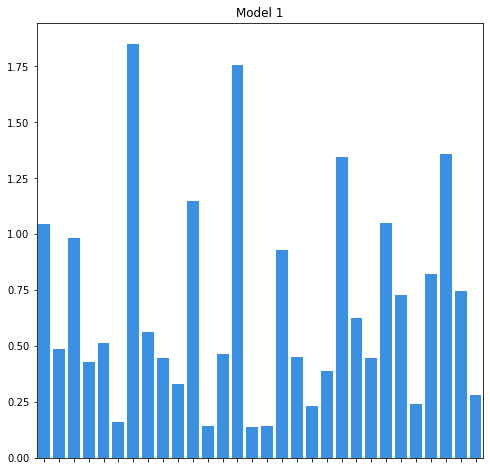

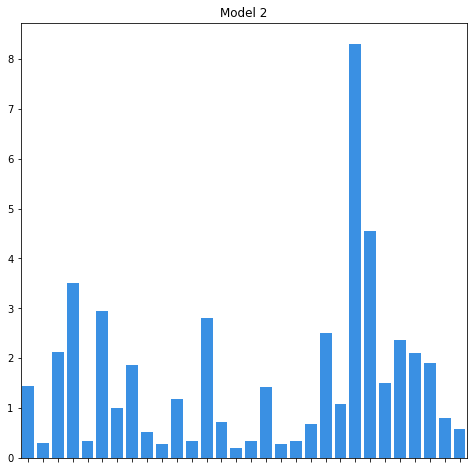

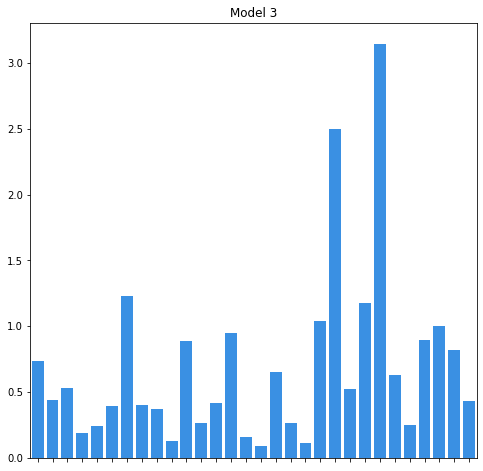

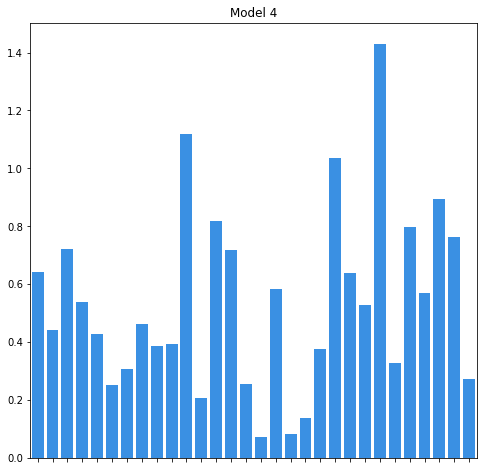

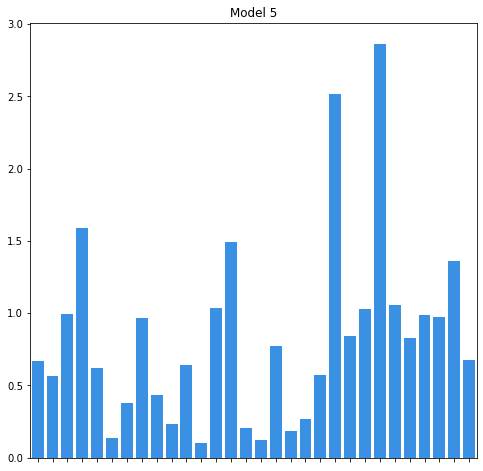

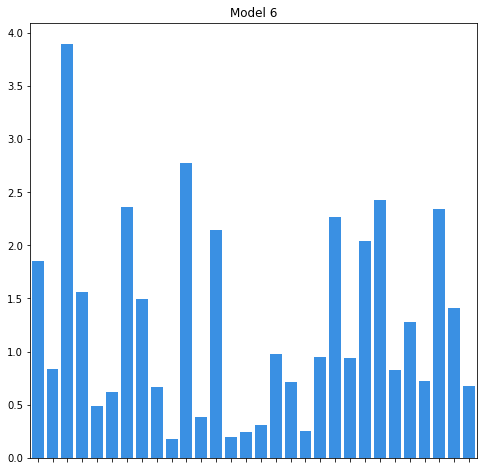

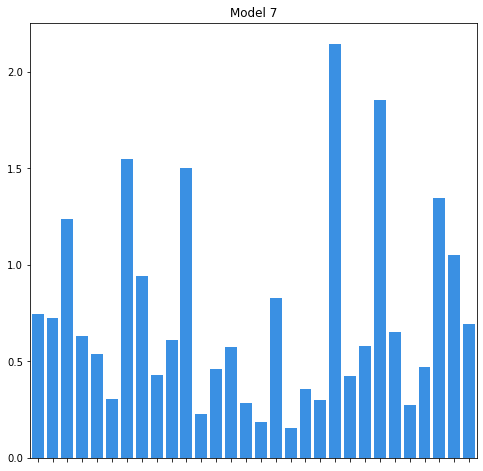

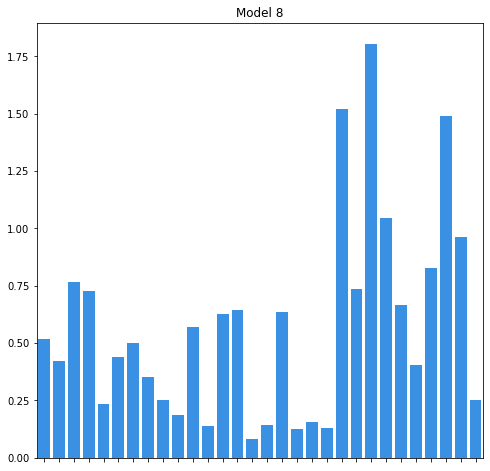

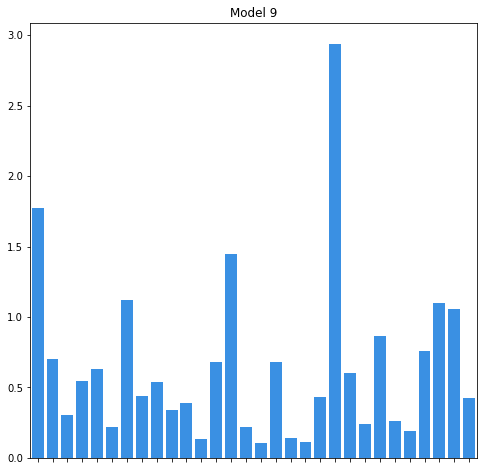

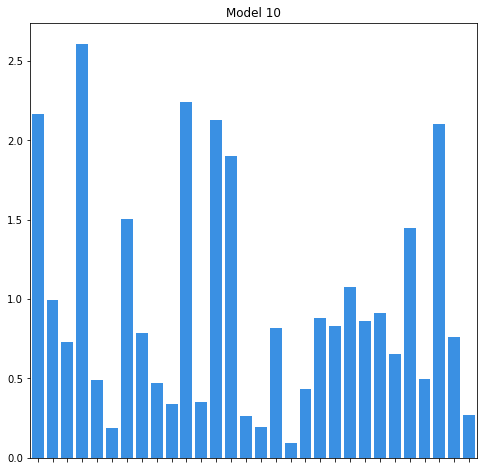

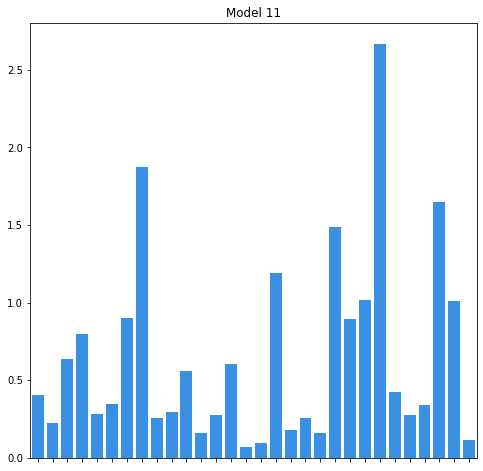

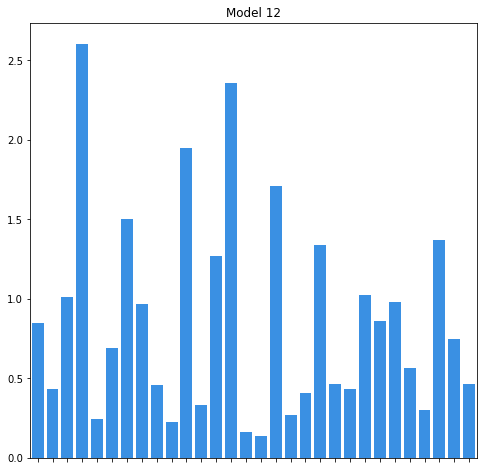

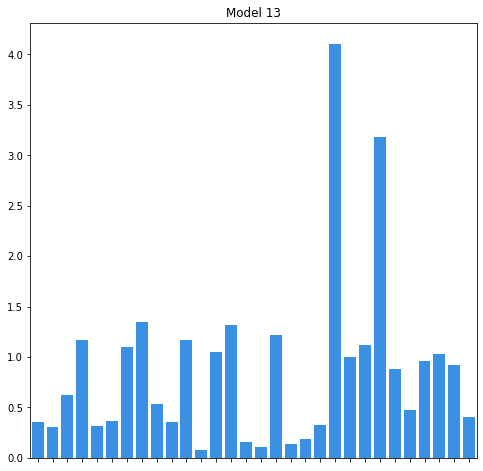

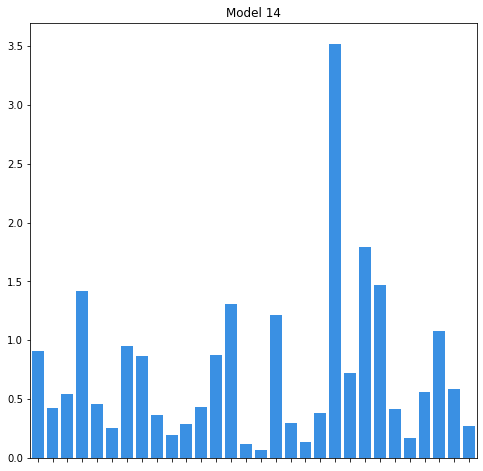

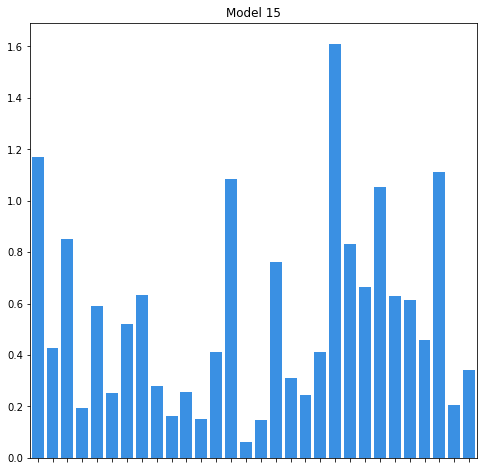

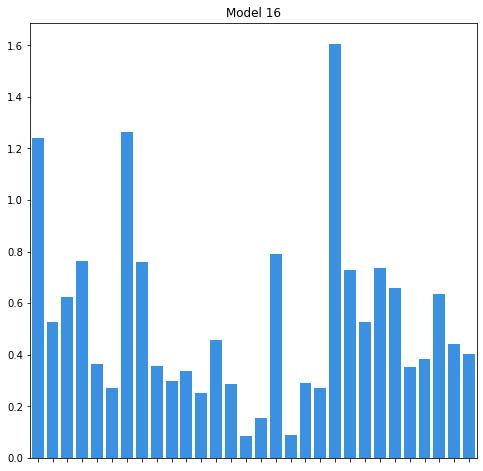

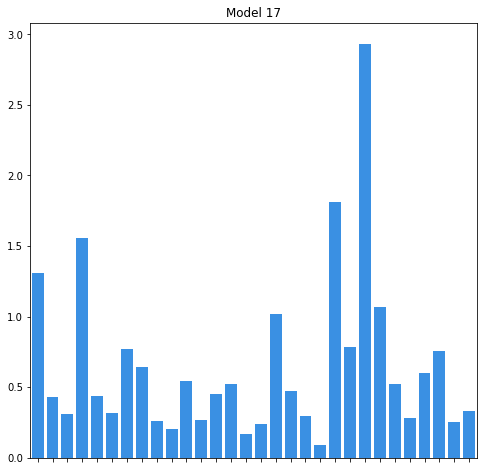

In [25]:
rashomon.show_results(xlabels = False)

You can choose subset of models:

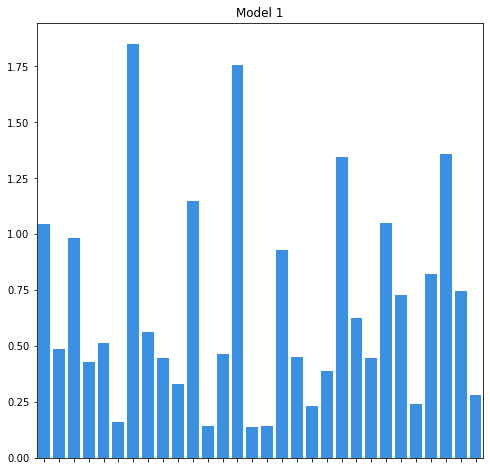

In [26]:
rashomon.show_results(model_names = ['Model 1'], xlabels = False)

And subset of features:

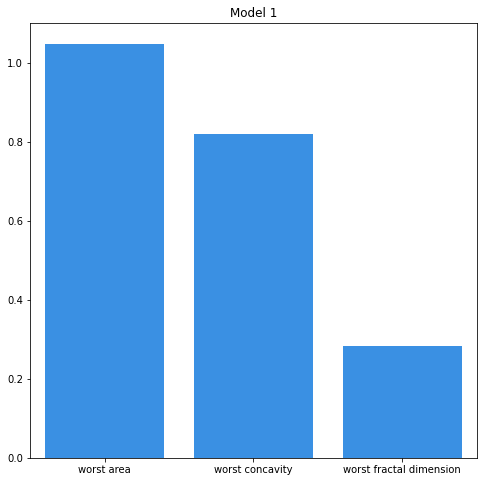

In [27]:
rashomon.show_results(model_names = ['Model 1'], features = ['worst fractal dimension', 'worst concavity', 'worst area'], xlabels = True)

### Barplots of sum of metric values for each model

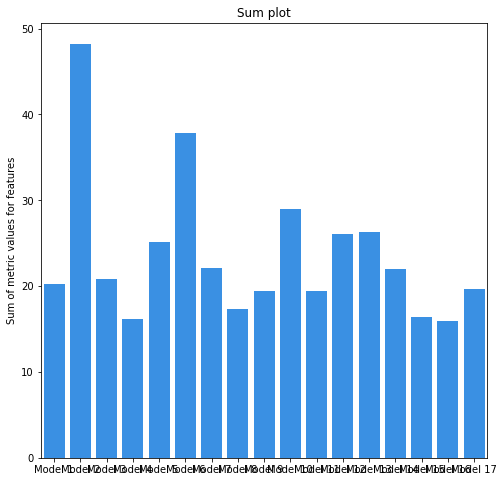

In [28]:
rashomon.sum_plot()

As before, you can choose subset of models:

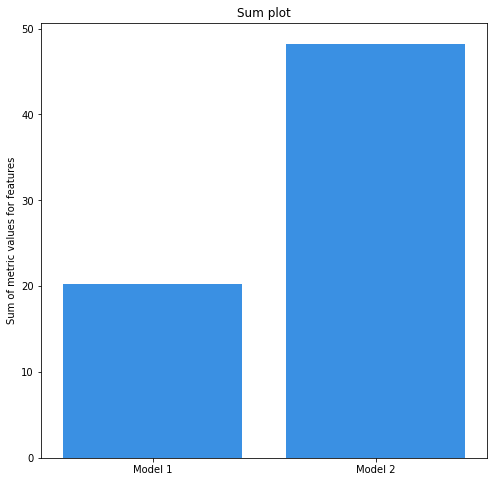

In [29]:
rashomon.sum_plot(model_names=['Model 1', 'Model 2'])

And subset of features:

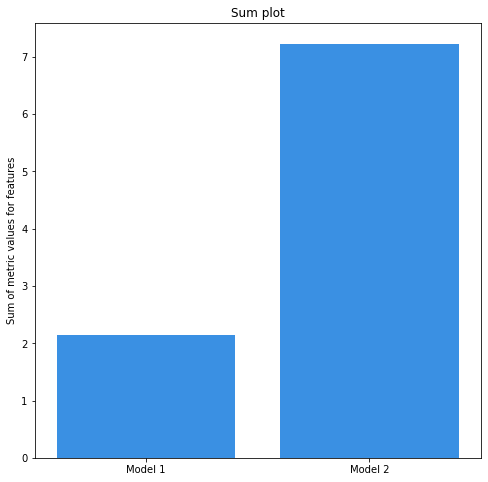

In [30]:
rashomon.sum_plot(model_names=['Model 1', 'Model 2'], features = ['worst fractal dimension', 'worst concavity', 'worst area'])

### Boxplot per feature

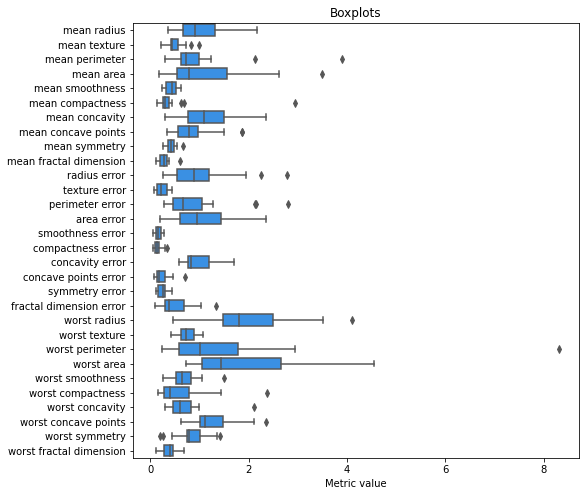

In [31]:
rashomon.boxplots(xlabels = True)

As before, you can choose subset of models:

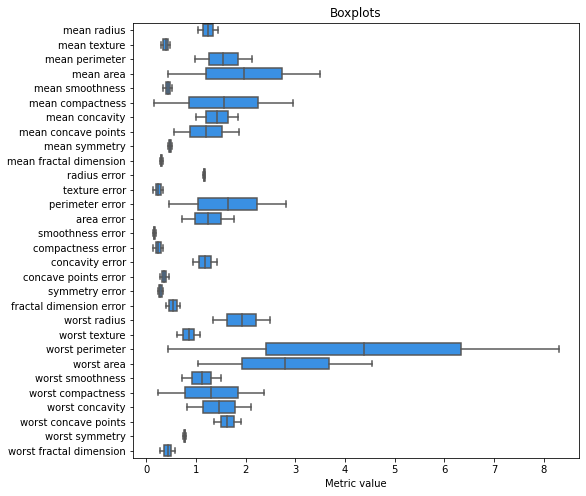

In [32]:
rashomon.boxplots(model_names=['Model 1', 'Model 2'], xlabels = True)

And subset of features:

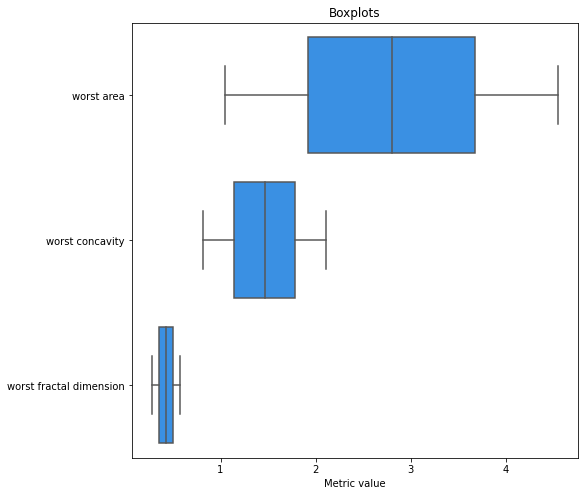

In [33]:
rashomon.boxplots(model_names=['Model 1', 'Model 2'], features=['worst fractal dimension', 'worst concavity', 'worst area'], xlabels = True)

### Histograms of metric values

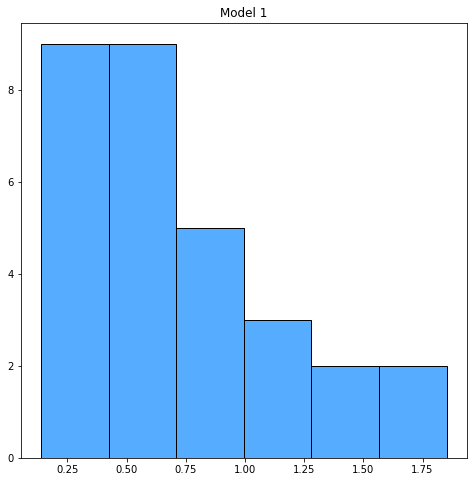

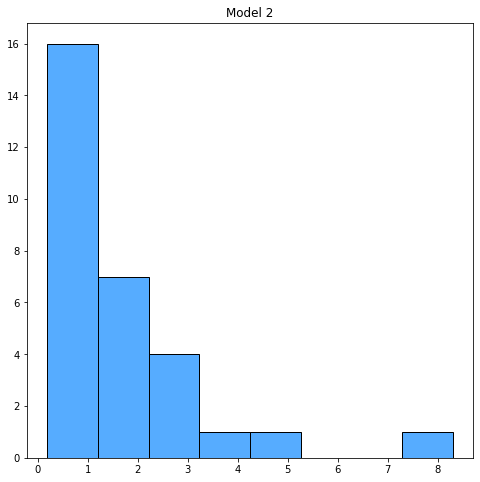

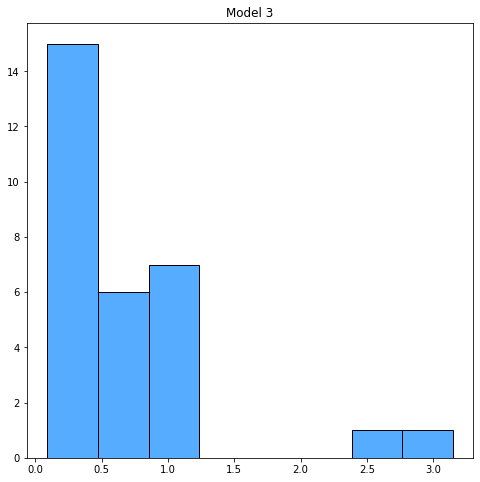

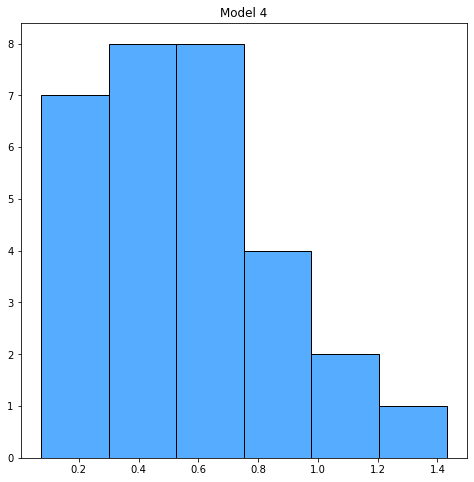

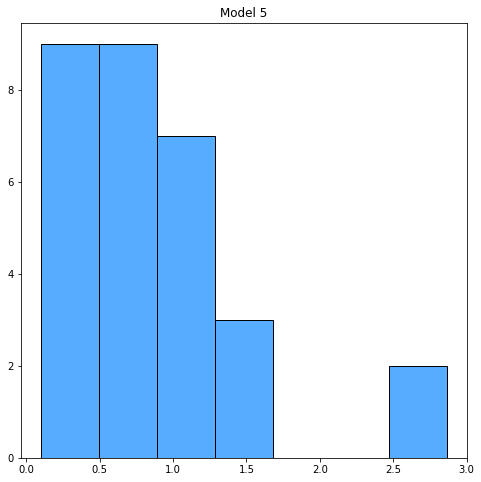

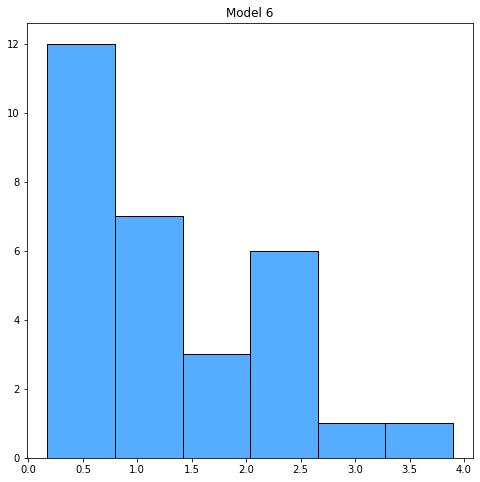

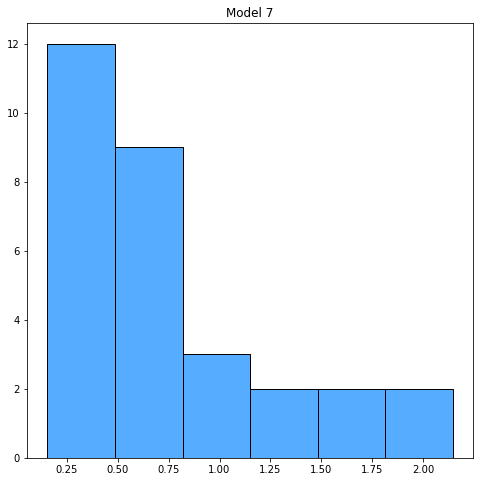

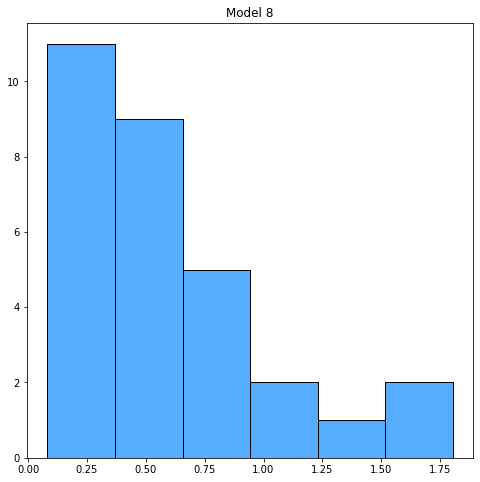

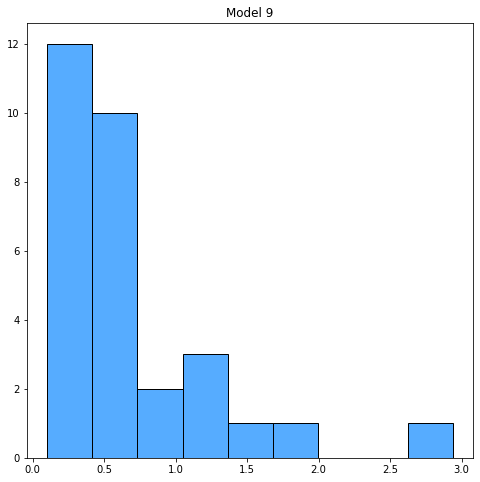

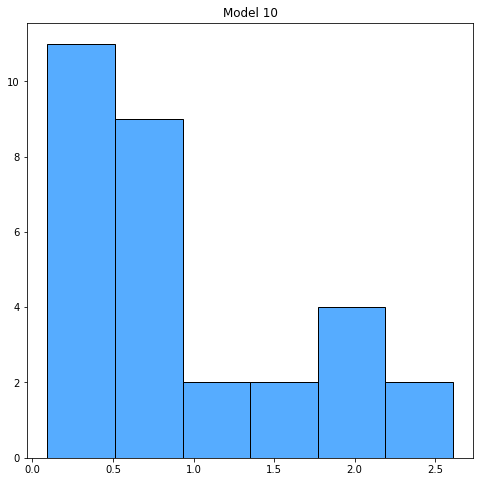

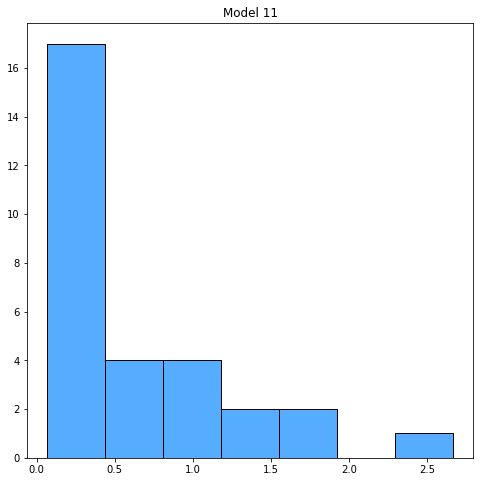

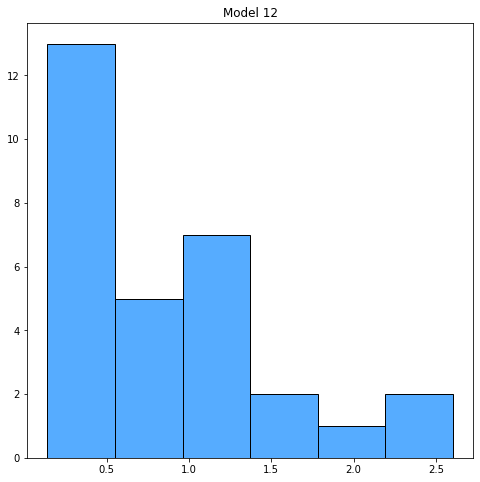

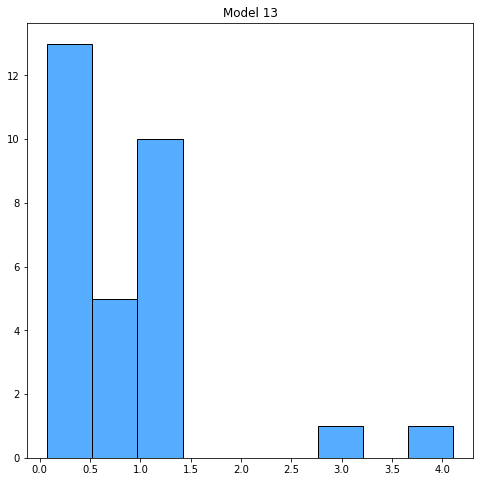

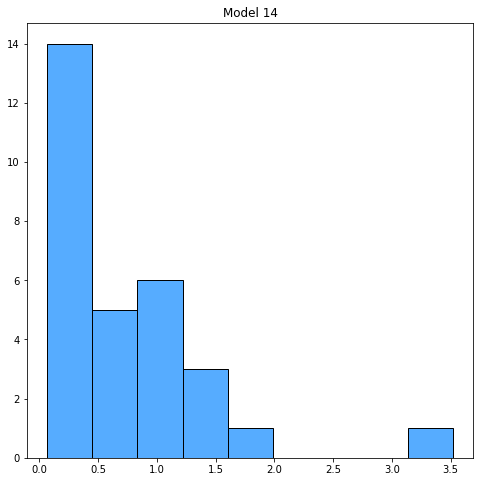

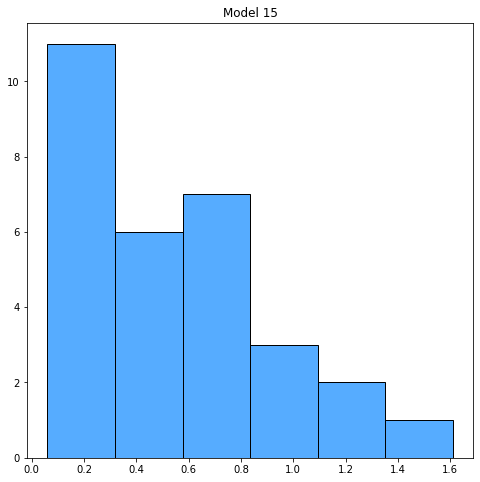

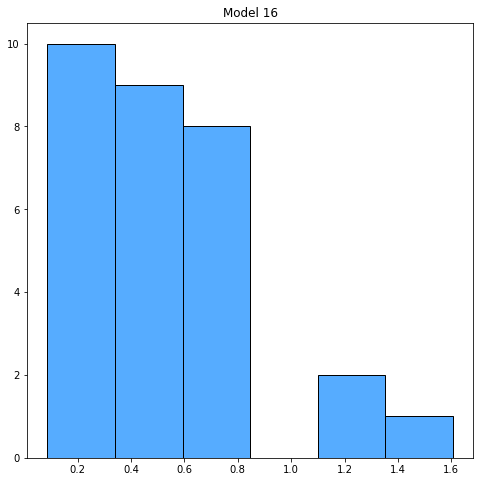

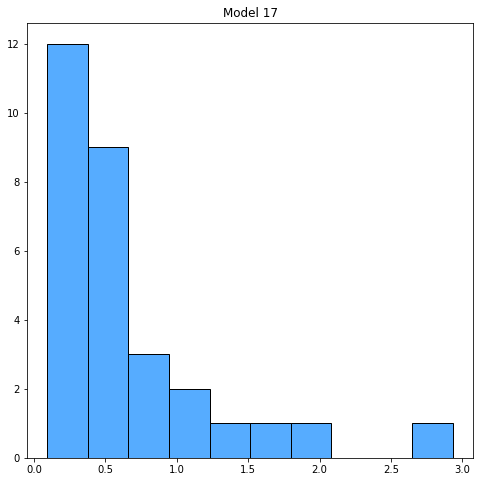

In [34]:
rashomon.histograms()

### PDP plots

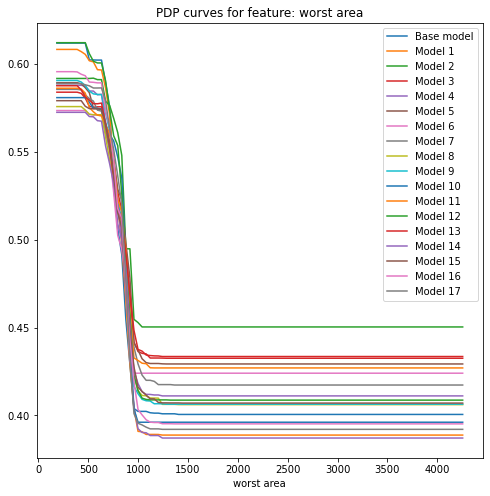

In [35]:
rashomon.pdp_profile(X, y, features = ['worst area'])

And you can also choose the subset of models

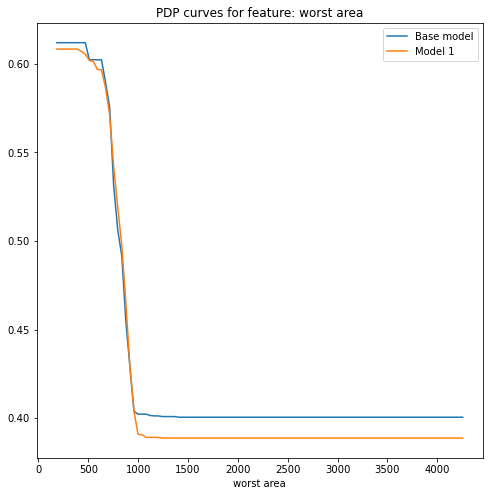

In [36]:
rashomon.pdp_profile(X, y, features = ['worst area'], model_names = ['Model 1'])